### K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

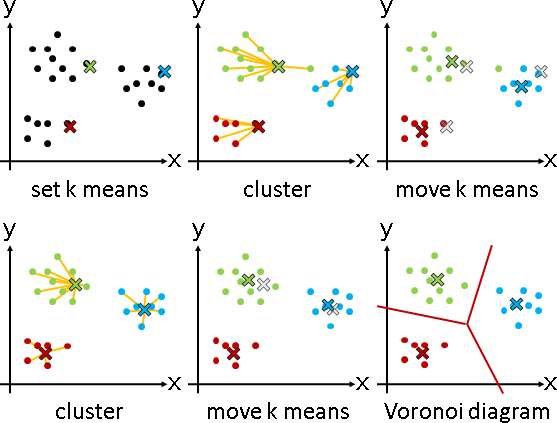

In [1]:
## k-Means illustration

from IPython.display import Image
Image('Clustering_kmeans_step.png' , width=400) 

In [68]:
from sklearn.datasets import make_blobs
X,y=make_blobs(centers=3,n_samples=500,n_features=2,shuffle=True,random_state=40)

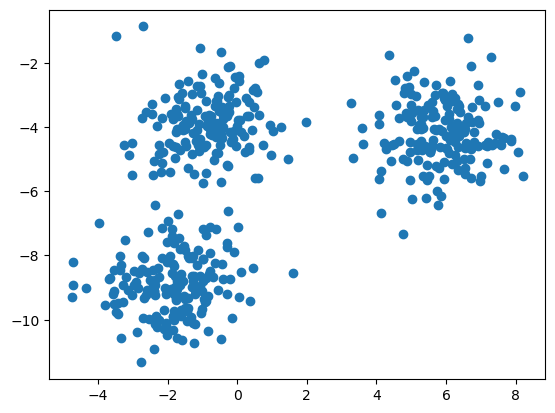

In [69]:
plt.scatter(X[:,0], X[:,1])

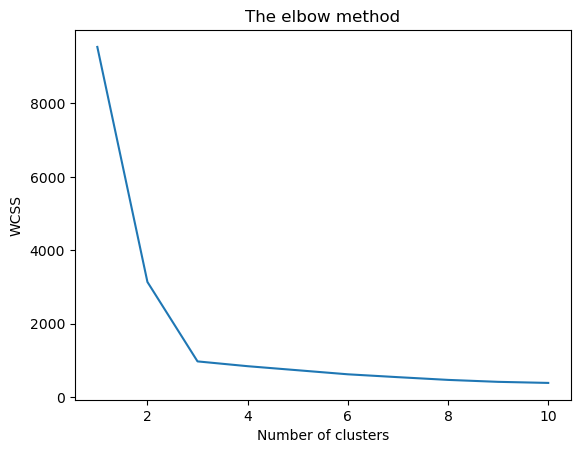

In [70]:
# Finding the optimum number of clusters for k-means classification


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11, 1), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [71]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300)
y_kmeans = kmeans.fit_predict(X)

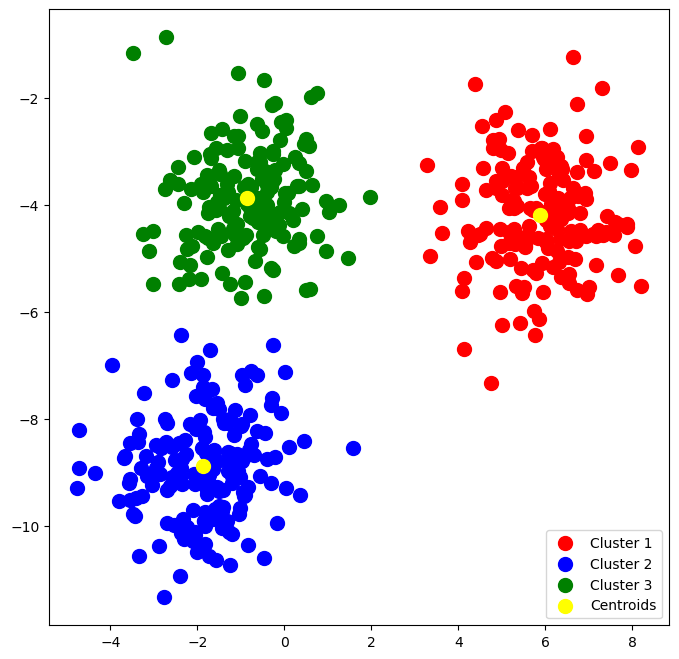

In [72]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [73]:
kmeans.cluster_centers_

array([[ 5.88032652, -4.18480765],
       [-1.86315371, -8.87400825],
       [-0.86175784, -3.87190776]])

In [74]:
kmeans.labels_

array([1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1,
       1, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2,
       0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2,

In [75]:
labels_1 = kmeans.labels_[kmeans.labels_ == 1]
len(labels_1)

169

In [76]:
labels_0 = kmeans.labels_[kmeans.labels_ == 0]
len(labels_0)

167

In [77]:
labels_2 = kmeans.labels_[kmeans.labels_ == 2]
len(labels_2)

164

In [78]:
kmeans.n_iter_

3

## Let's do the same with Silhouette analysis

In [79]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [80]:
import warnings
warnings.filterwarnings('ignore')

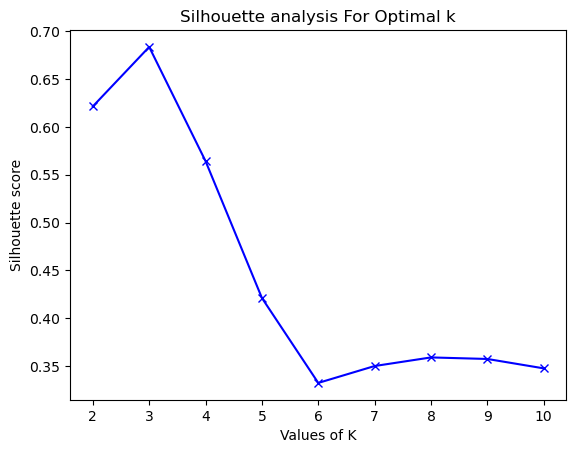

In [81]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
  
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [82]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300)
y_kmeans = kmeans.fit_predict(X)

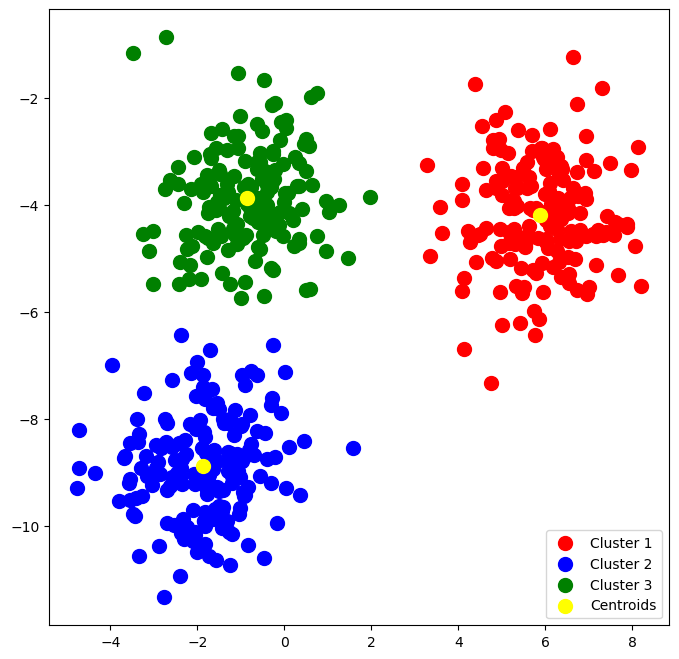

In [83]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Let's do the same thing without using the Kmeans library of sklearn

In [84]:
np.random.seed(42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans_:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    
    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters



    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        colors = ['blue', 'green', 'red']
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point, label = 'Cluster ' + str(i + 1), c = colors[i], s = 100)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2, s = 100)
        plt.legend(loc = 'lower right')
        plt.show()
    def plot_elbow(self, X):
      sse = []
      for k in range(1, self.K+1):
          self.K = k
          self.predict(X)
          sse.append(self.calculate_sse())
      plt.plot(range(1, self.K+1), sse)
      plt.xlabel("Number of Clusters")
      plt.ylabel("SSE")
      plt.title("Elbow Plot")
      plt.show()

    def calculate_sse(self):
        sse = 0
        for i, centroid in enumerate(self.centroids):
            cluster = self.X[self.clusters[i]]
            distances = np.linalg.norm(cluster - centroid, axis=1)
            sse += np.sum(distances ** 2)
        return sse



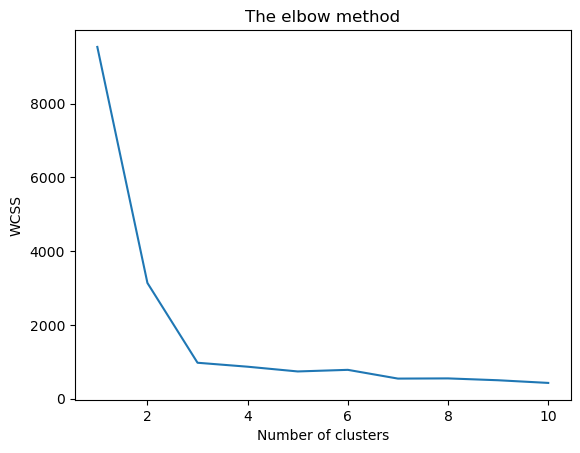

In [85]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans_(K=i, max_iters=150, plot_steps=False)
  kmeans.predict(X)
  wcss.append(kmeans.calculate_sse())
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Having the optimal value of K, we can now use it and plot the clustering

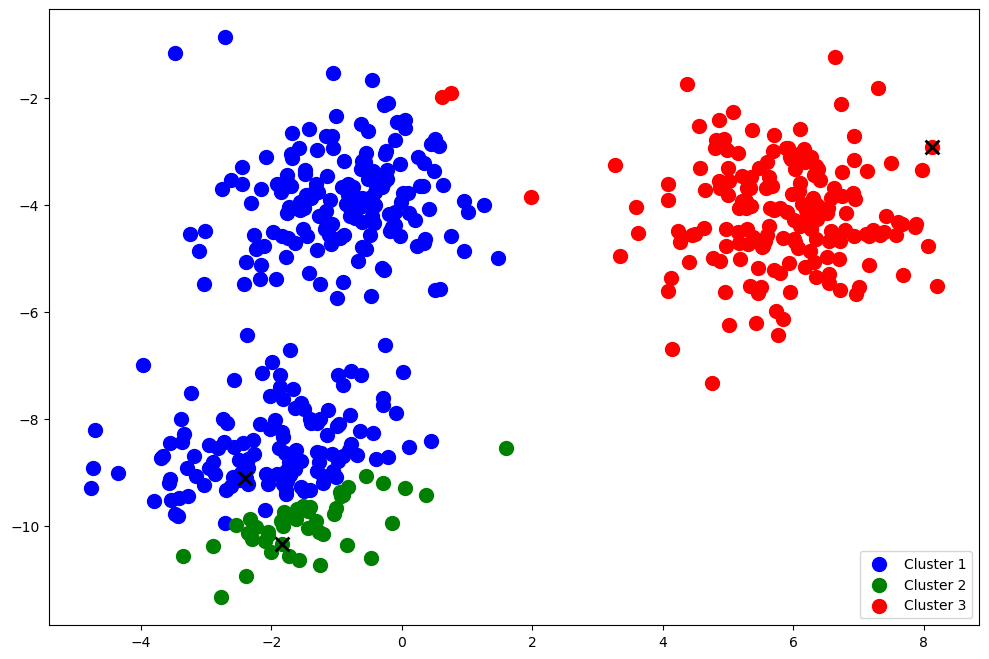

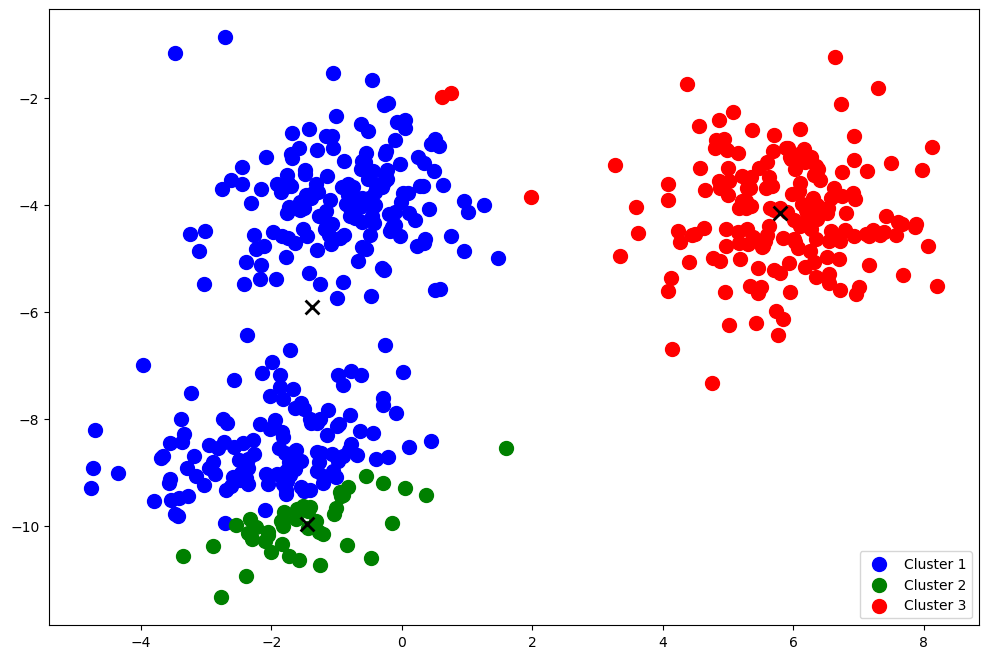

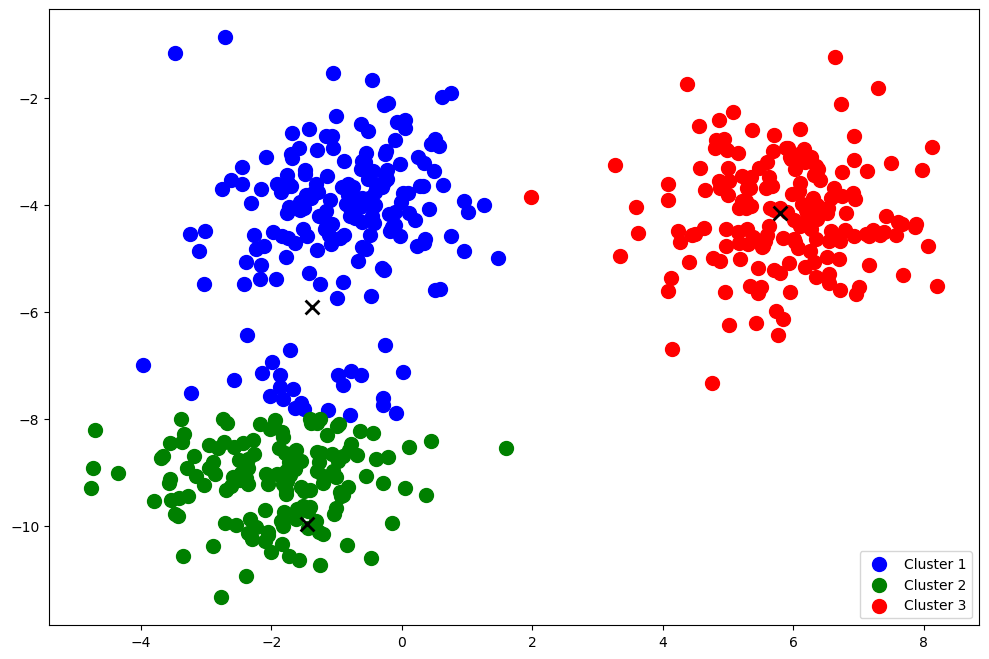

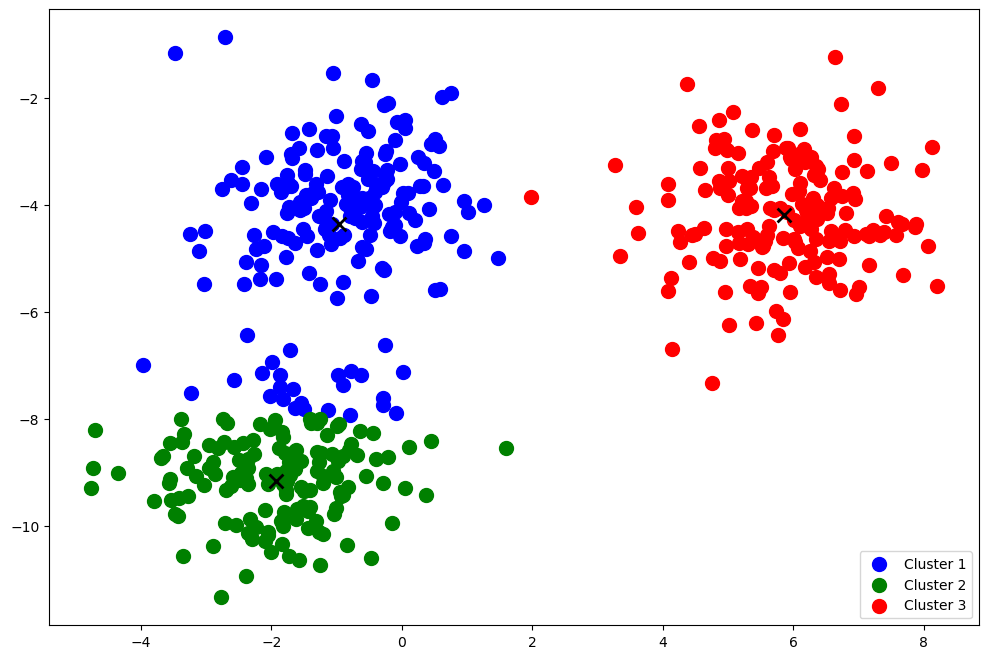

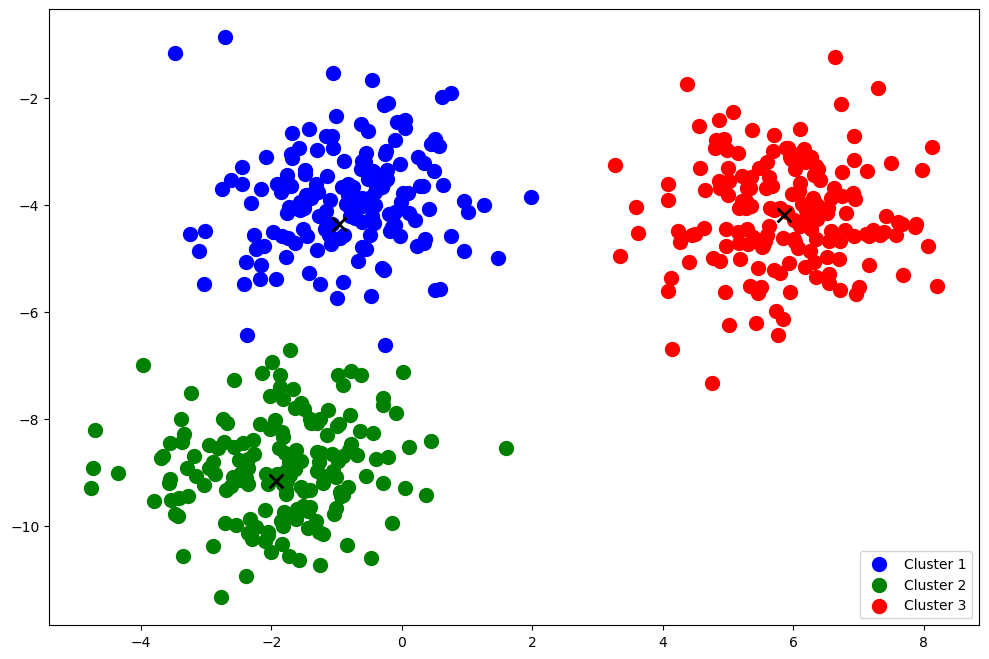

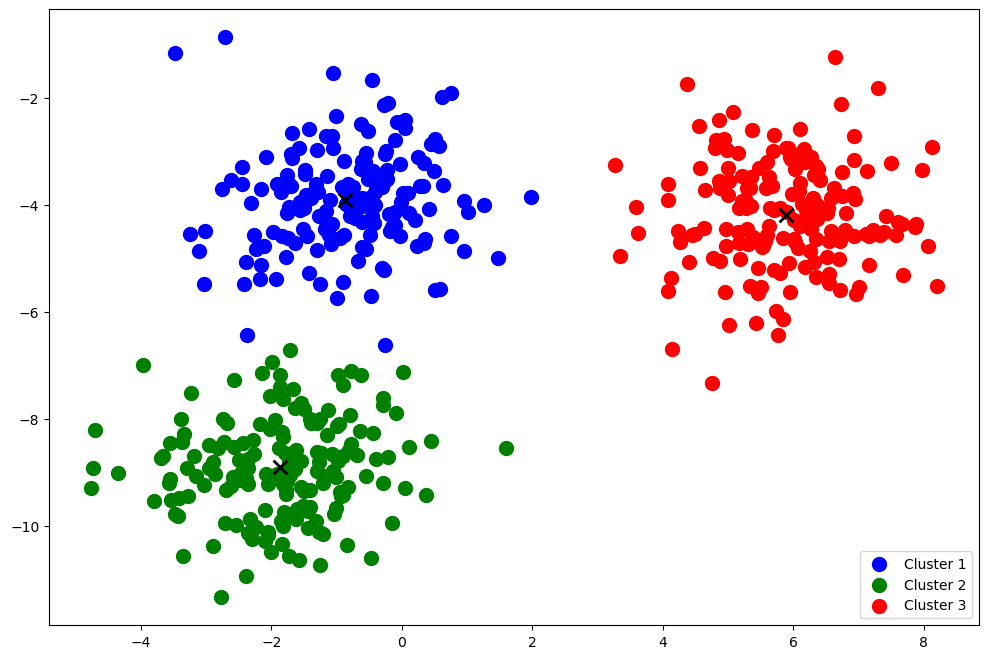

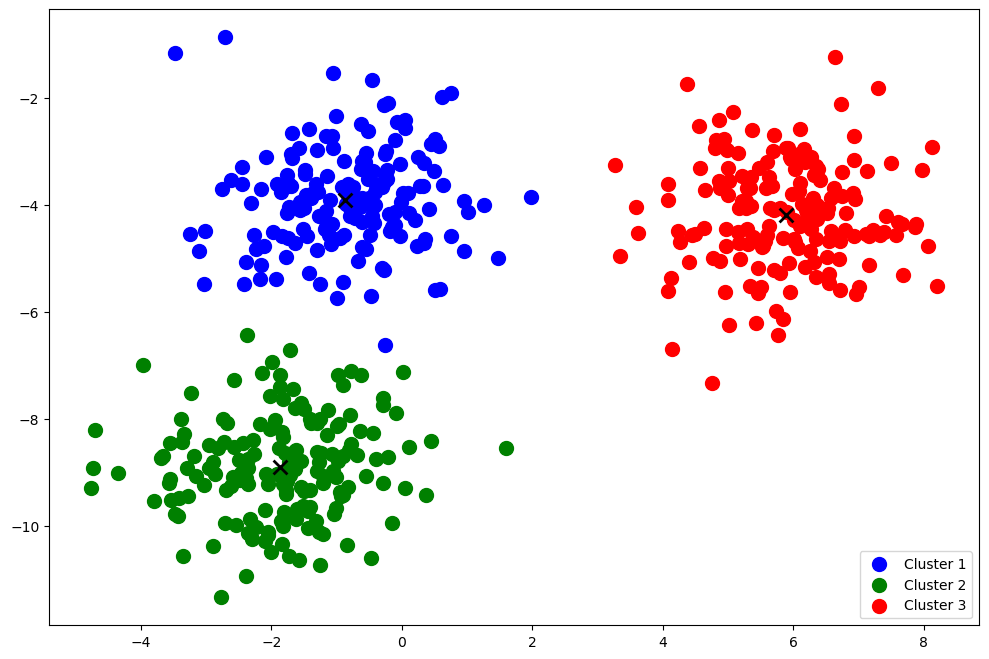

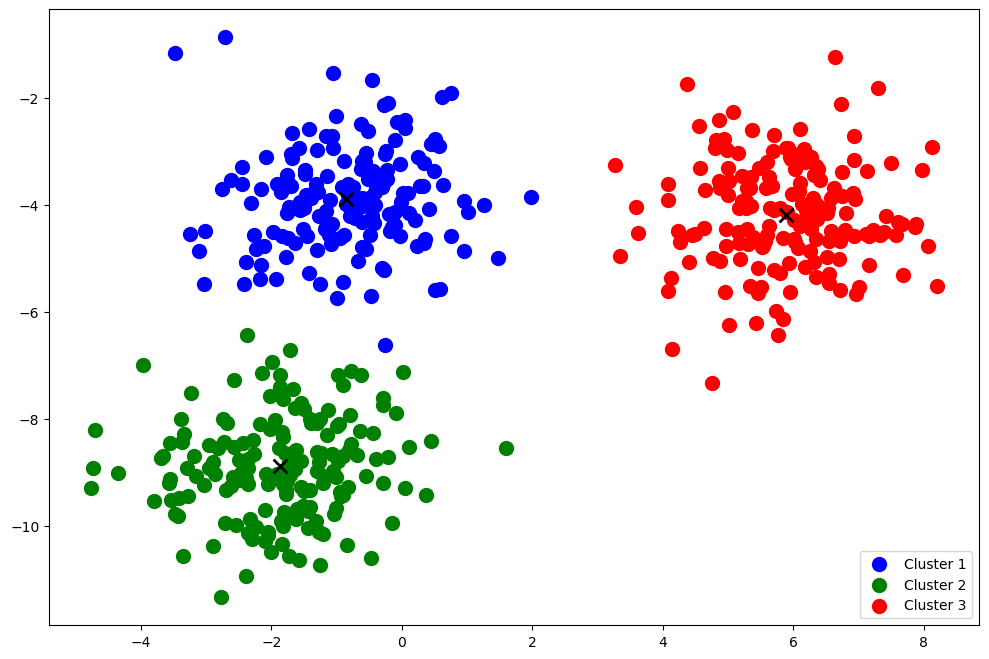

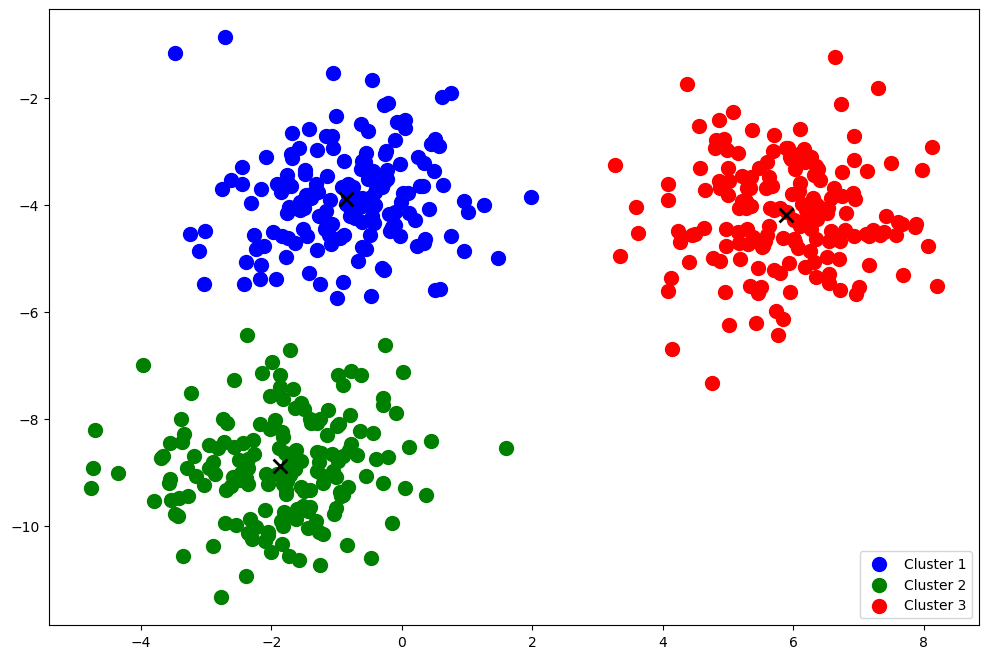

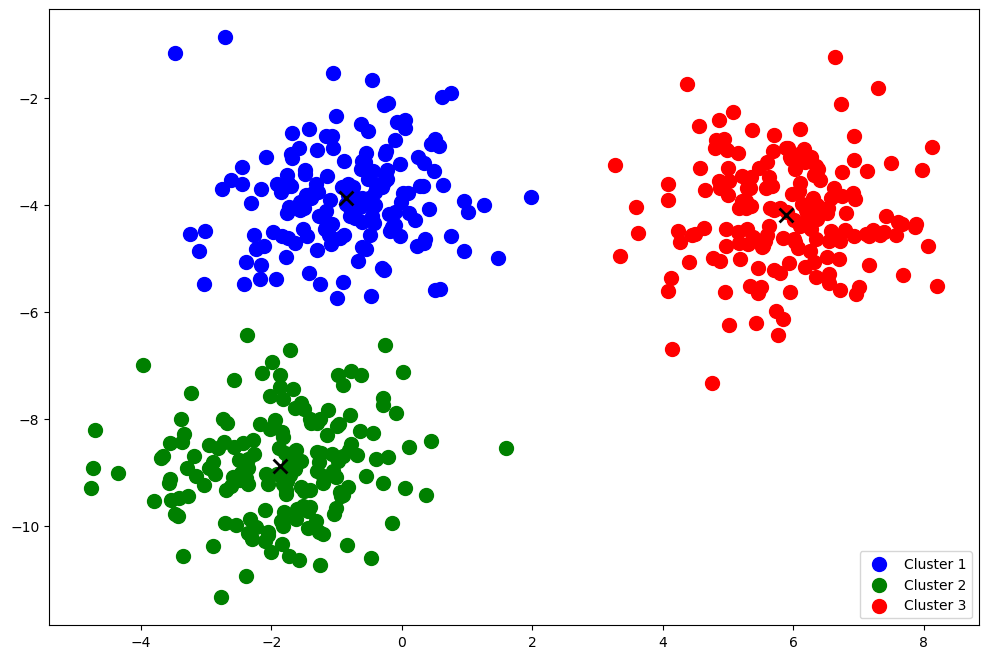

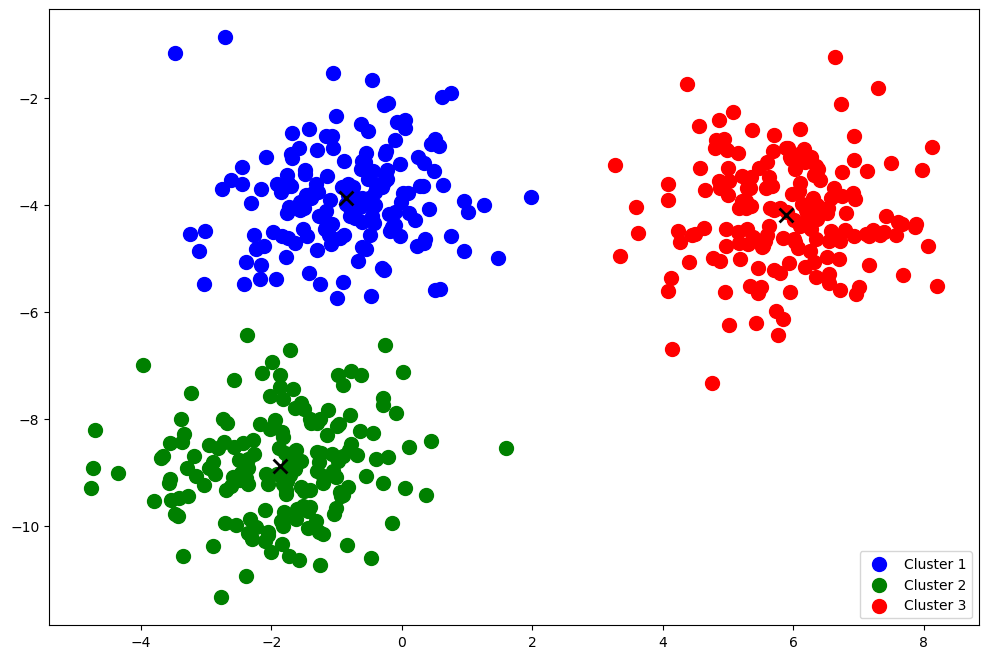

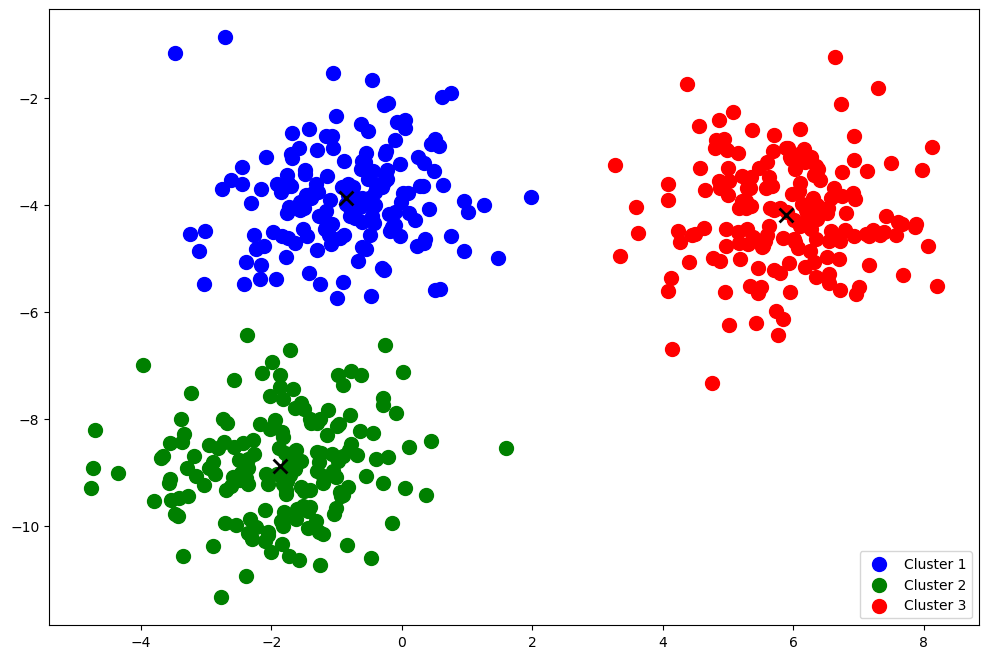

In [86]:
k = KMeans_(K=3, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()

### Using silhouette Analysis

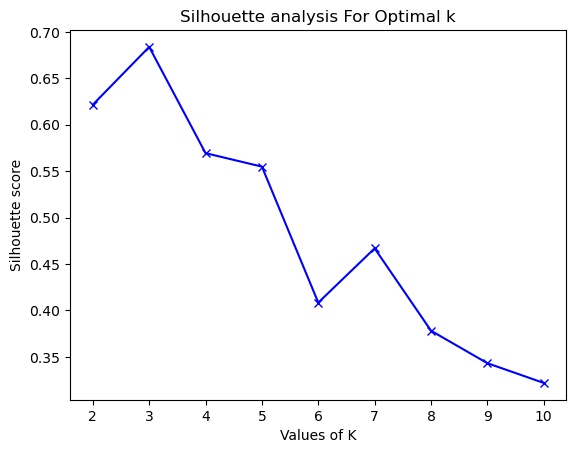

In [87]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans_(K=num_clusters, max_iters=150)
    cluster_labels = kmeans.predict(X)

 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

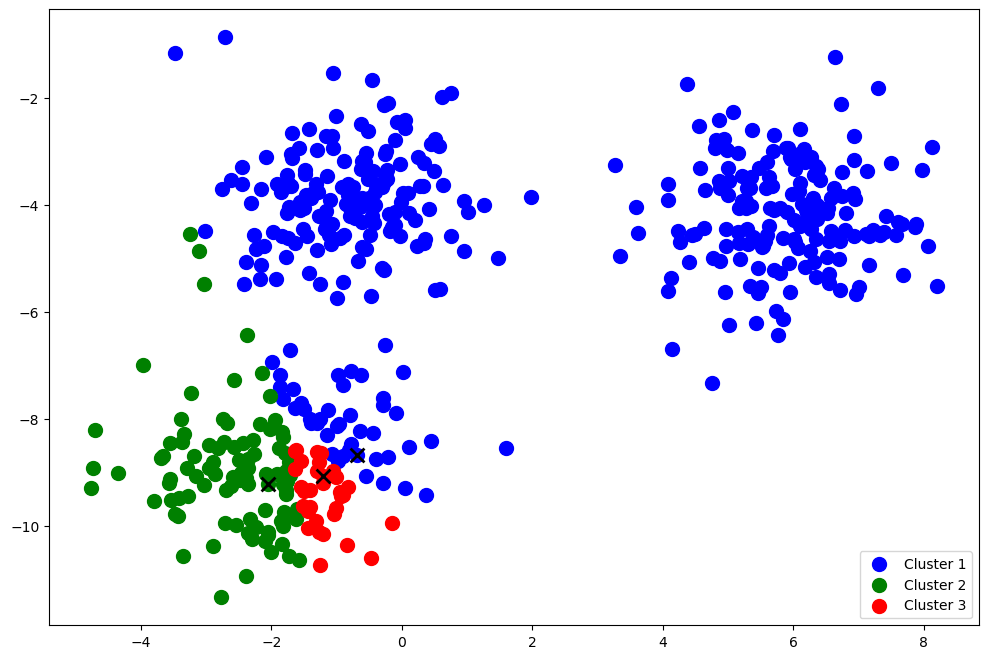

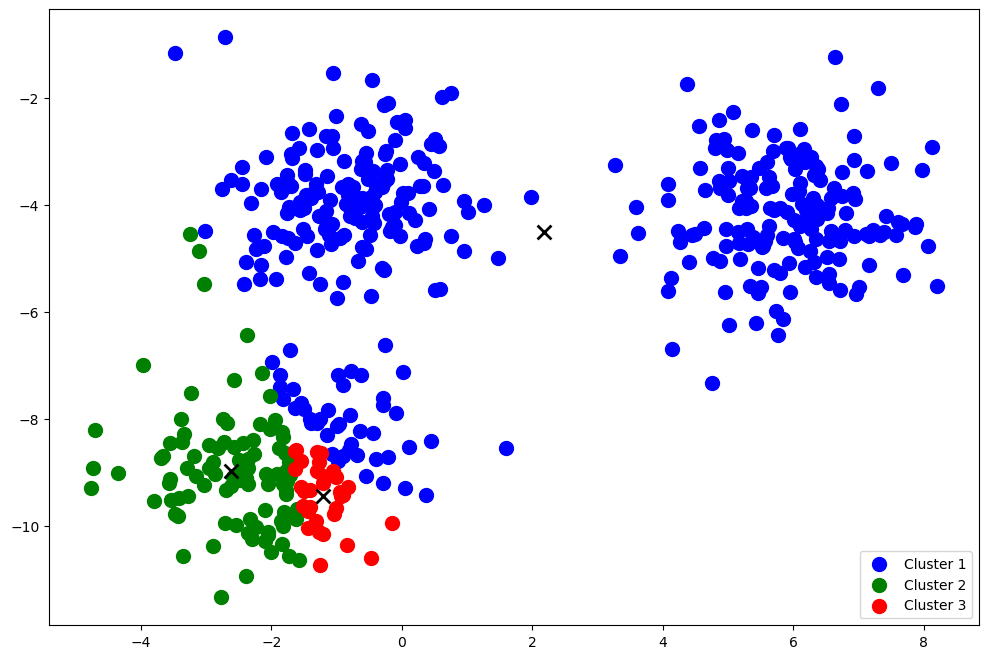

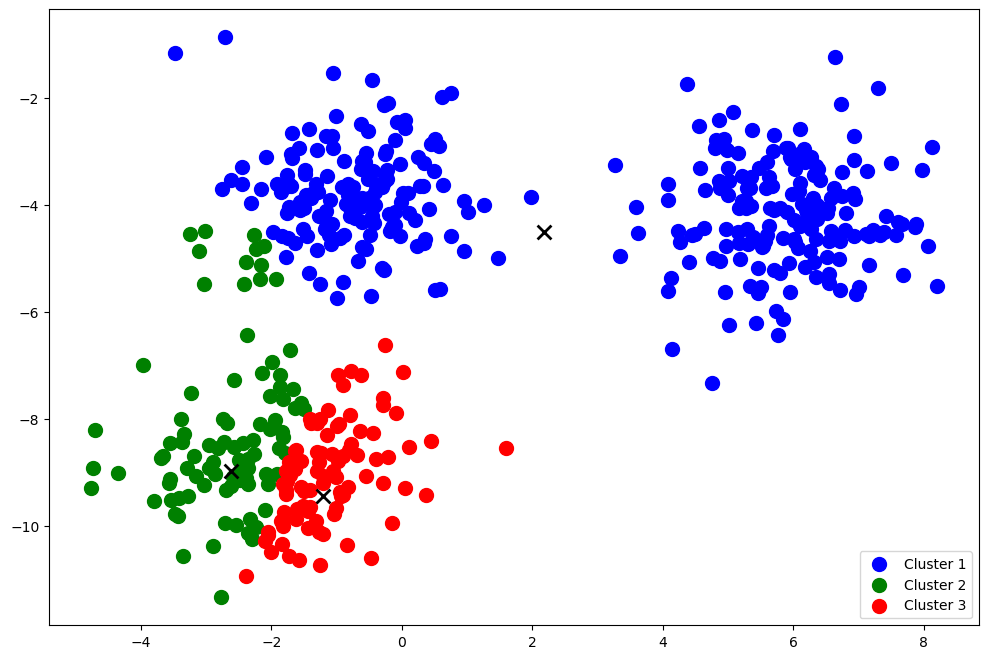

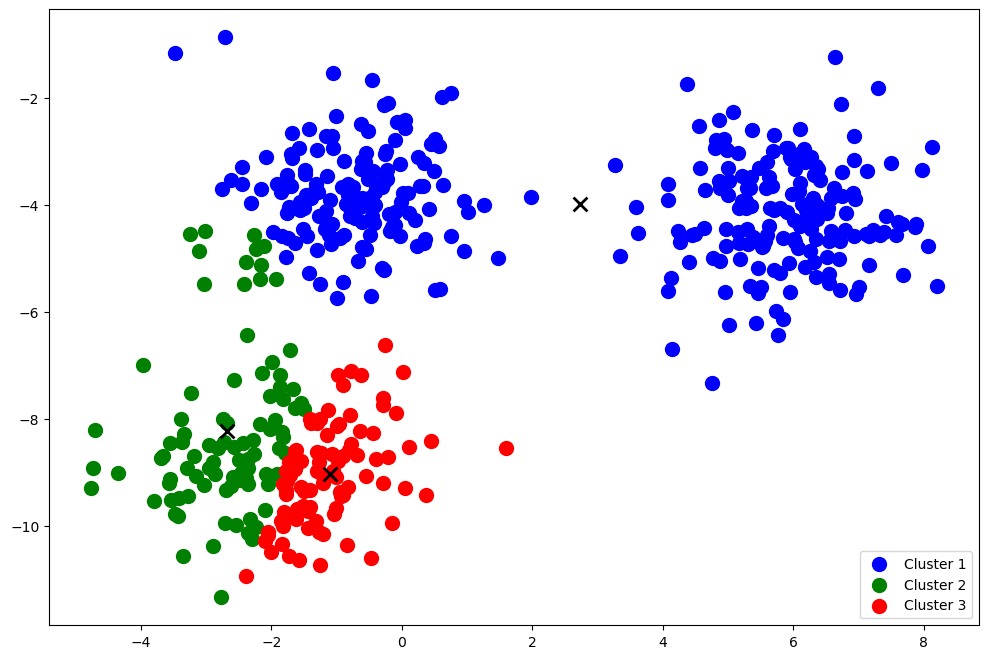

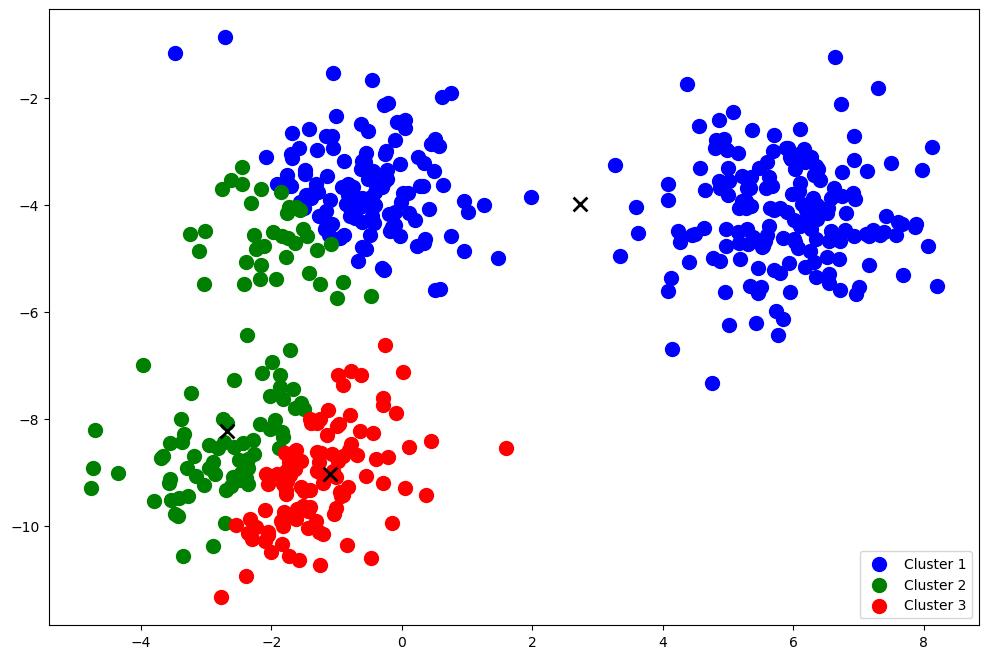

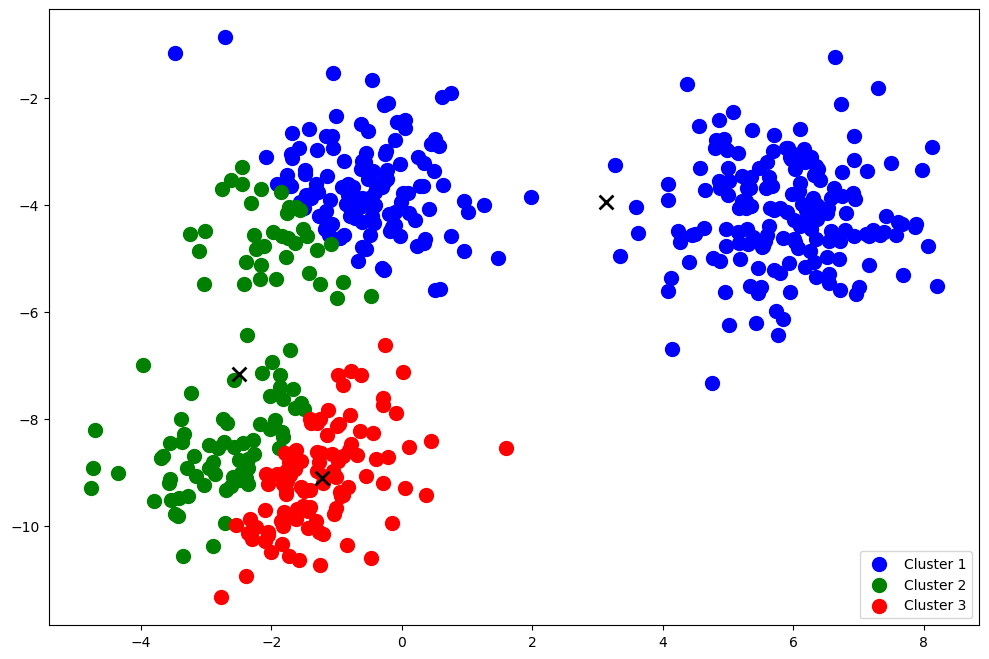

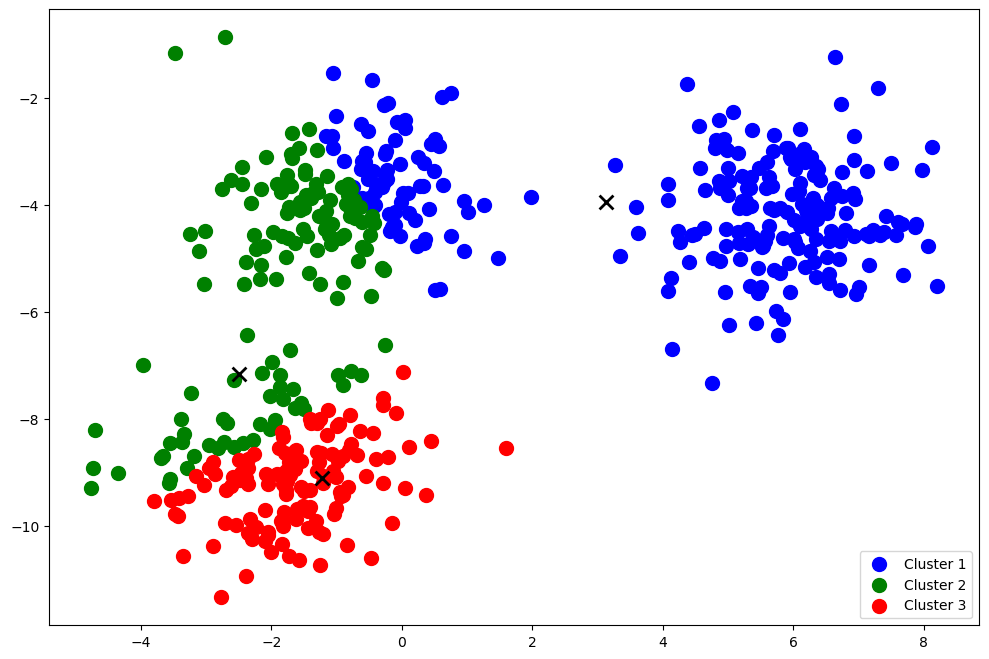

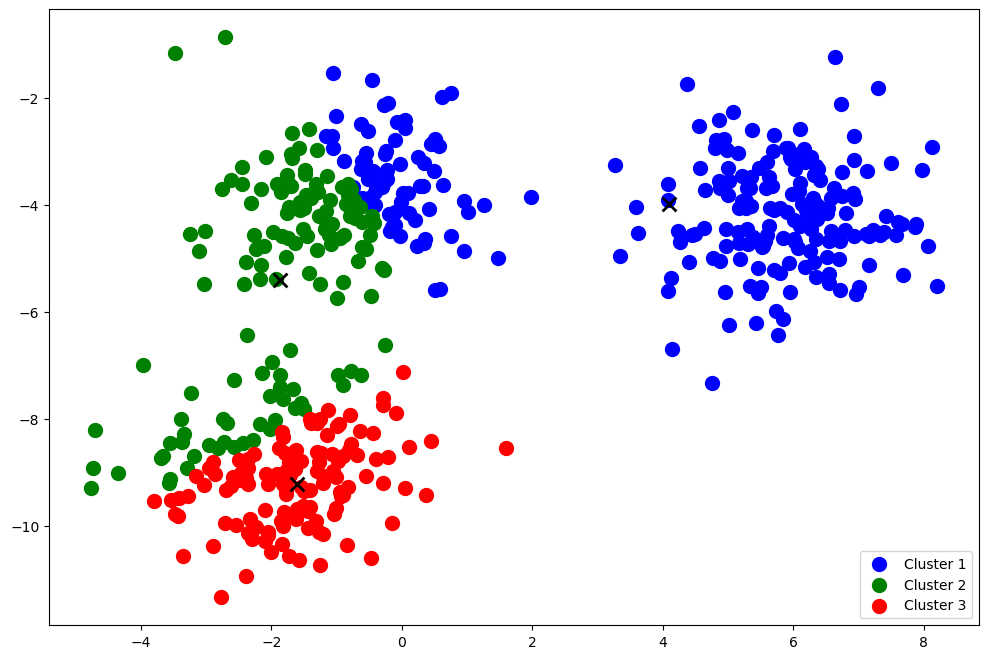

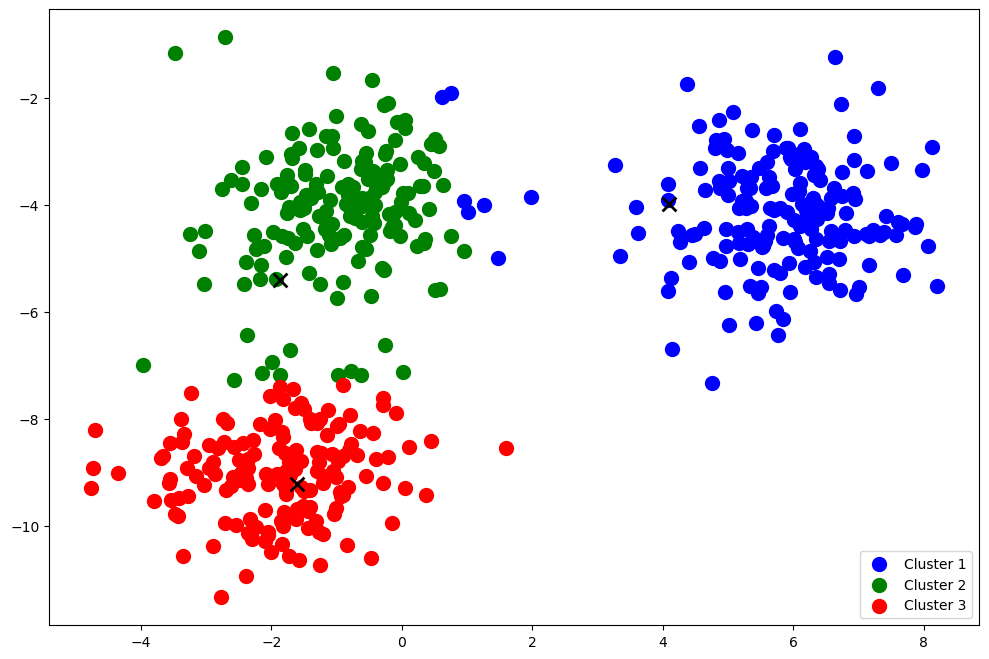

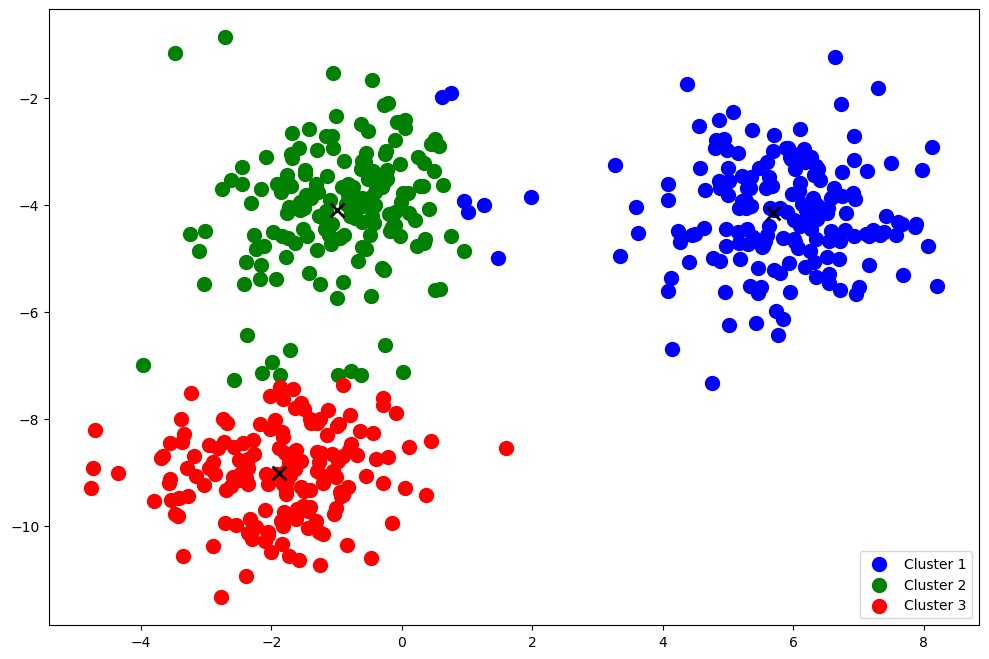

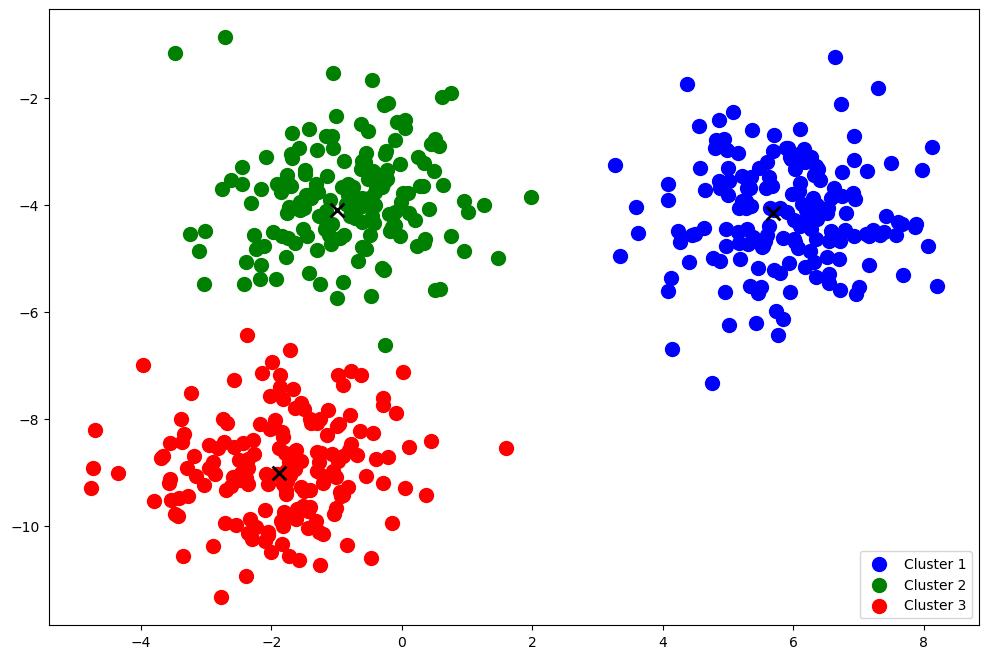

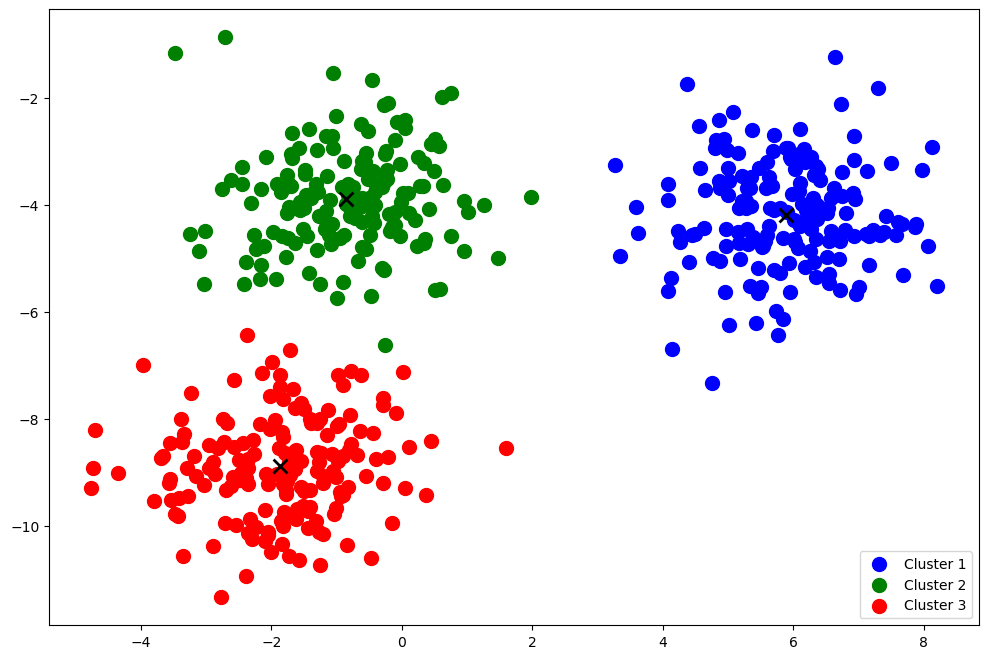

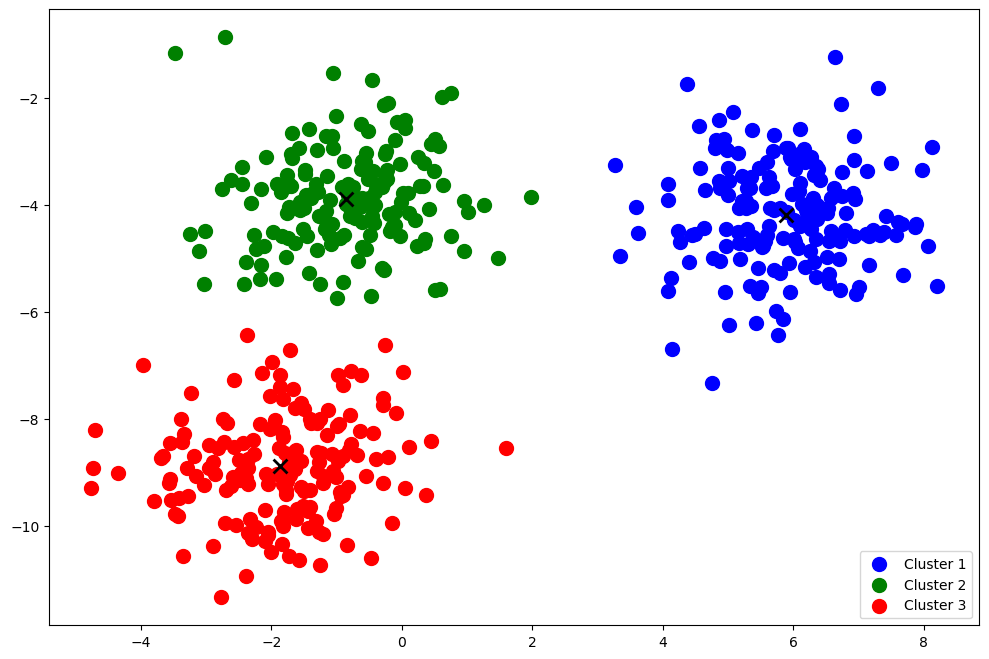

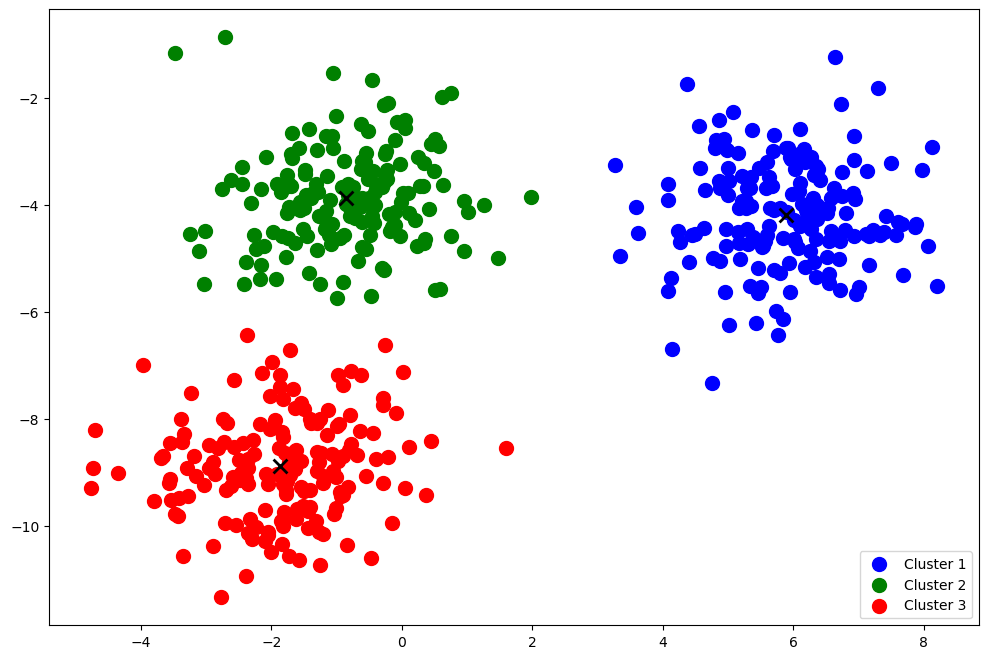

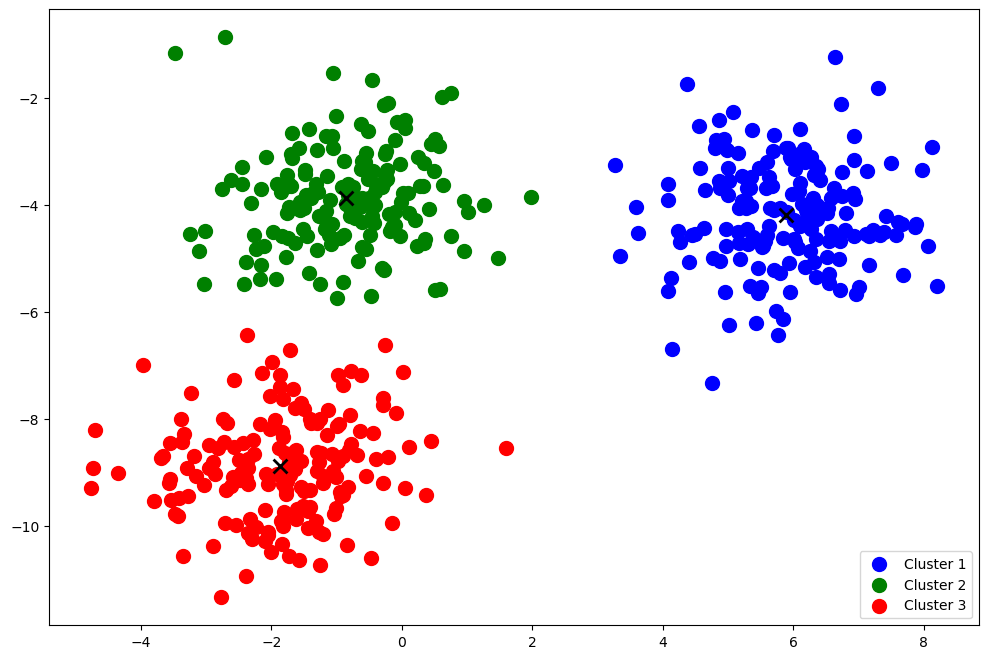

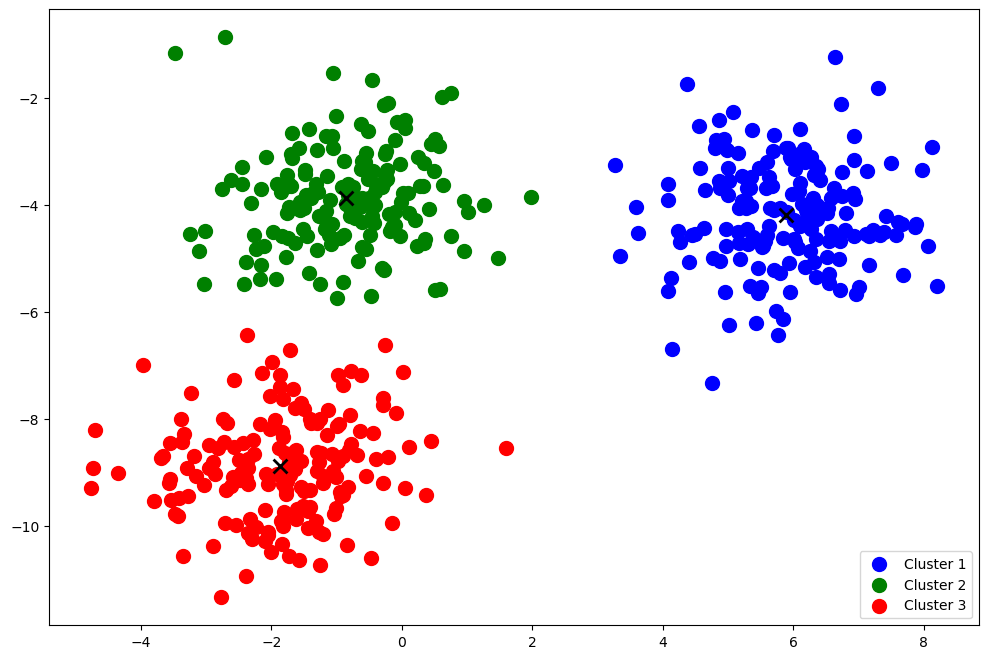

In [88]:
k = KMeans_(K=3, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()